# Exercices XP Ninja
Dernière mise à jour : 13 septembre 2024

Ce que vous apprendrez :
Héritage


Exercice 1 : Le jeu de la vie de Conway
Ce que vous allez créer
Le jeu de la vie de Conway



Instructions
Voici les règles du jeu de la vie (comme indiqué dans Wikipédia) :

L'univers du Jeu de la Vie est une grille orthogonale infinie et bidimensionnelle de cellules carrées, chacune étant dans l'un des deux états possibles, vivant ou mort (ou peuplé et non peuplé, respectivement).

Chaque cellule interagit avec ses huit voisines , c'est-à-dire les cellules adjacentes horizontalement , verticalement ou diagonalement . À chaque étape, les transitions suivantes se produisent :

Toute cellule vivante ayant moins de deux voisines vivantes meurt, comme par sous-population.
Toute cellule vivante avec deux ou trois voisines vivantes survit à la génération suivante.
Toute cellule vivante ayant plus de trois voisines vivantes meurt, comme par surpopulation.
Toute cellule morte ayant exactement trois voisines vivantes devient une cellule vivante, comme par reproduction.
En utilisant ces règles, implémentez le jeu. (Astuce : utilisez des classes !!!!)
Utilisez quelques états initiaux différents pour voir comment le jeu se termine.

Remarques :

Afficher la grille après chaque génération
La fin du jeu est entièrement déterminée par l'état initial. Faites-le donc passer par votre programme et observez son issue.
Soyez créatif, mais utilisez des classes
Le jeu peut avoir des bordures fixes ou mobiles. Commencez par implémenter les bordures fixes. Chaque cellule « active » qui sort de la bordure quitte le jeu.
Bonus : Créez un jeu avec des bordures toujours extensibles, faites en sorte que la taille maximale des bordures soit très grande (10 000) afin de ne pas provoquer de débordement de mémoire.


In [1]:
# 1 : Classe Cell pour représenter chaque cellule

class Cell:
    def __init__(self, alive=False):
        self.alive = alive

    def __str__(self):
        return "█" if self.alive else " "  # Affichage: bloc plein pour vivant, vide pour mort


In [4]:
# 2 : Classe GameOfLife qui gère la grille et les règles

class GameOfLife:
    def __init__(self, rows, cols, initial_state=None):
        self.rows = rows
        self.cols = cols
        # Création d'une grille vide
        self.grid = [[Cell(False) for _ in range(cols)] for _ in range(rows)]
        # Si état initial donné (liste de tuples (r, c)), on place des cellules vivantes
        if initial_state:
            for (r, c) in initial_state:
                if 0 <= r < rows and 0 <= c < cols:
                    self.grid[r][c].alive = True

    def display(self):
        # Affiche la grille actuelle
        print("-" * (self.cols + 2))
        for row in self.grid:
            print("|" + "".join(str(cell) for cell in row) + "|")
        print("-" * (self.cols + 2))

    def count_alive_neighbors(self, r, c):
        # Compte les voisins vivants autour de la cellule (r, c)
        directions = [(-1, -1), (-1, 0), (-1, 1),
                      ( 0, -1),          ( 0, 1),
                      ( 1, -1), ( 1, 0), ( 1, 1)]
        count = 0
        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            if 0 <= nr < self.rows and 0 <= nc < self.cols:
                if self.grid[nr][nc].alive:
                    count += 1
        return count

    def step(self):
        # Génère la prochaine génération selon les règles
        new_grid = [[Cell(False) for _ in range(self.cols)] for _ in range(self.rows)]
        for r in range(self.rows):
            for c in range(self.cols):
                alive_neighbors = self.count_alive_neighbors(r, c)
                if self.grid[r][c].alive:
                    # Survie
                    if alive_neighbors == 2 or alive_neighbors == 3:
                        new_grid[r][c].alive = True
                    # Sinon, mort par sous/surpopulation (restera False)
                else:
                    # Reproduction
                    if alive_neighbors == 3:
                        new_grid[r][c].alive = True
        self.grid = new_grid


In [5]:
# 3 : Test avec un état initial simple (motif "Glider")

# Grille 10x10, motif "glider" en haut à gauche
init = [(1,2), (2,3), (3,1), (3,2), (3,3)]
jeu = GameOfLife(10, 10, initial_state=init)

# Affiche 10 générations
import time

for gen in range(10):
    print(f"Génération {gen+1}:")
    jeu.display()
    jeu.step()
    time.sleep(0.5)  # Petite pause pour lisibilité (optionnel)


Génération 1:
------------
|          |
|  █       |
|   █      |
| ███      |
|          |
|          |
|          |
|          |
|          |
|          |
------------
Génération 2:
------------
|          |
|          |
| █ █      |
|  ██      |
|  █       |
|          |
|          |
|          |
|          |
|          |
------------
Génération 3:
------------
|          |
|          |
|   █      |
| █ █      |
|  ██      |
|          |
|          |
|          |
|          |
|          |
------------
Génération 4:
------------
|          |
|          |
|  █       |
|   ██     |
|  ██      |
|          |
|          |
|          |
|          |
|          |
------------
Génération 5:
------------
|          |
|          |
|   █      |
|    █     |
|  ███     |
|          |
|          |
|          |
|          |
|          |
------------


KeyboardInterrupt: 

## Alternative
Voici une variante ergonomique et dynamique du Jeu de la Vie, avec animation et choix interactif de la taille de la grille, utilisable dans un notebook Jupyter (ou avec adaptation dans un script Python).
Tout est en blocs, direct, sans ajout inutile.
Utilisation de matplotlib pour l’animation.

In [6]:
# 1 : Importations nécessaires
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import random


In [7]:
# 2 : Classe pour gérer le Jeu de la Vie (version numpy pour rapidité/ergonomie)

class GameOfLifeDynamic:
    def __init__(self, rows, cols, random_fill=False, initial_state=None):
        self.rows = rows
        self.cols = cols
        if initial_state is not None:
            self.grid = np.zeros((rows, cols), dtype=int)
            for (r, c) in initial_state:
                if 0 <= r < rows and 0 <= c < cols:
                    self.grid[r, c] = 1
        elif random_fill:
            # Grille aléatoire
            self.grid = np.random.choice([0, 1], size=(rows, cols))
        else:
            self.grid = np.zeros((rows, cols), dtype=int)

    def step(self):
        new_grid = np.copy(self.grid)
        for r in range(self.rows):
            for c in range(self.cols):
                # Compter les voisins vivants
                neighbors = np.sum(self.grid[max(0, r-1):min(r+2, self.rows),
                                             max(0, c-1):min(c+2, self.cols)]) - self.grid[r, c]
                if self.grid[r, c] == 1:
                    if neighbors < 2 or neighbors > 3:
                        new_grid[r, c] = 0
                else:
                    if neighbors == 3:
                        new_grid[r, c] = 1
        self.grid = new_grid


In [8]:
# 3 : Fonction d’animation dynamique (matplotlib)

def animate_game_of_life(rows=20, cols=20, generations=100, random_fill=True, initial_state=None, interval=200):
    game = GameOfLifeDynamic(rows, cols, random_fill=random_fill, initial_state=initial_state)
    fig, ax = plt.subplots()
    mat = ax.matshow(game.grid, cmap='binary')
    plt.axis('off')

    def update(*args):
        game.step()
        mat.set_data(game.grid)
        return [mat]

    anim = animation.FuncAnimation(
        fig, update, frames=generations, interval=interval, blit=True, repeat=False
    )
    plt.show()


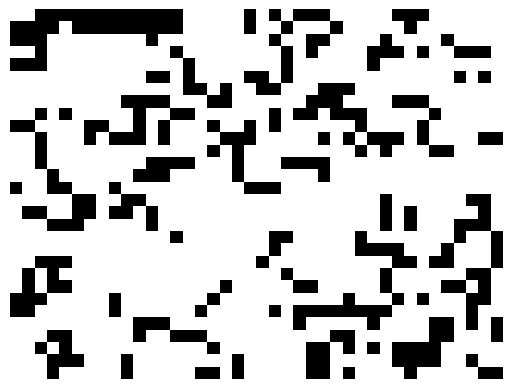

In [13]:
# 4 : Exemple d’utilisation – choix de la taille et du mode

# Exemple avec taille choisie par l'utilisateur (modifie ces valeurs selon ton besoin)
rows = 30
cols = 40
generations = 100

# Pour grille aléatoire
animate_game_of_life(rows=rows, cols=cols, generations=generations, random_fill=True)

# Pour motif initial précis (par exemple, un glider en haut à gauche)
# glider = [(1,2), (2,3), (3,1), (3,2), (3,3)]
# animate_game_of_life(rows=20, cols=20, generations=50, random_fill=False, initial_state=glider)


In [18]:
import numpy as np
import time
from IPython.display import clear_output

class GameOfLifeRealtime:
    def __init__(self, rows, cols, random_fill=True):
        self.rows = rows
        self.cols = cols
        self.grid = np.random.choice([0, 1], size=(rows, cols)) if random_fill else np.zeros((rows, cols), dtype=int)

    def step(self):
        new_grid = np.copy(self.grid)
        for r in range(self.rows):
            for c in range(self.cols):
                neighbors = np.sum(self.grid[max(0, r-1):min(r+2, self.rows),
                                             max(0, c-1):min(c+2, self.cols)]) - self.grid[r, c]
                if self.grid[r, c] == 1:
                    if neighbors < 2 or neighbors > 3:
                        new_grid[r, c] = 0
                else:
                    if neighbors == 3:
                        new_grid[r, c] = 1
        self.grid = new_grid

    def display(self):
        print('\n'.join(''.join('█' if cell else ' ' for cell in row) for row in self.grid))

def run_game_jupyter(rows=200, cols=400, generations=1000, delay=0.1):
    game = GameOfLifeRealtime(rows, cols)
    for gen in range(generations):
        clear_output(wait=True)
        print(f"Génération {gen+1}:")
        game.display()
        game.step()
        time.sleep(delay)

run_game_jupyter(200, 400, 100, 0.1)


Génération 100:
       █  █    ███                                                                                                    ██                                                                  ██                           █       ██   █                       ██                   ██                                                                                                          ███                
      █   ██ ██   ██                                                                ███ █ █                          █  █                                                                 ██                           █       ██  █ █          ██          ██                   ██     █                         █                                              ██                          █  █               
     ██ █ ██ ██    █                                                                                                 ███                                     █                        